In [6]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
import calendar

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

c:\Users\ma3\anaconda3\envs\python_learn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


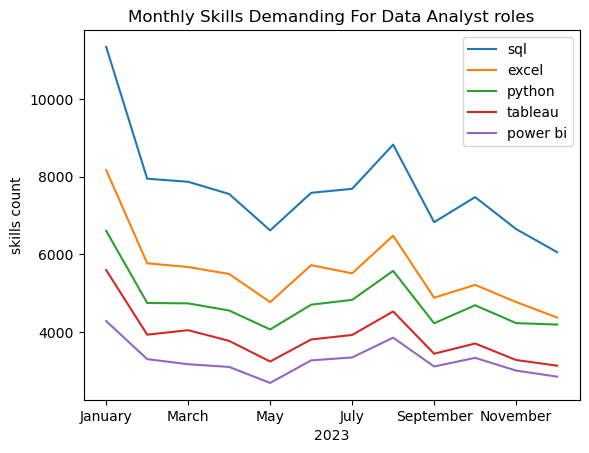

In [7]:
df_DA["month"] = df_DA["job_posted_date"].dt.month
df_DA = df_DA.explode("job_skills")
df_DA_skills_pivot = df_DA.pivot_table(index="month",columns="job_skills", aggfunc="size", fill_value=0)
df_DA_skills_pivot.loc["total"] = df_DA_skills_pivot.sum()
df_DA_skills_pivot =df_DA_skills_pivot[df_DA_skills_pivot.loc["total"].sort_values(ascending=False).head(10).index]
df_DA_skills_pivot = df_DA_skills_pivot.iloc[:, :5]
df_DA_skills_pivot = df_DA_skills_pivot.reset_index()
df_DA_skills_pivot = df_DA_skills_pivot[df_DA_skills_pivot["month"] != "total"]
df_DA_skills_pivot["month_name"] = df_DA_skills_pivot["month"].apply(lambda x: calendar.month_name[int(x)])
df_DA_skills_pivot.drop(columns="month", inplace=True)
df_DA_skills_pivot.plot(kind="line", x="month_name")
plt.title("Monthly Skills Demanding For Data Analyst roles")
plt.xlabel("2023")
plt.ylabel("skills count")
plt.legend()
plt.show()


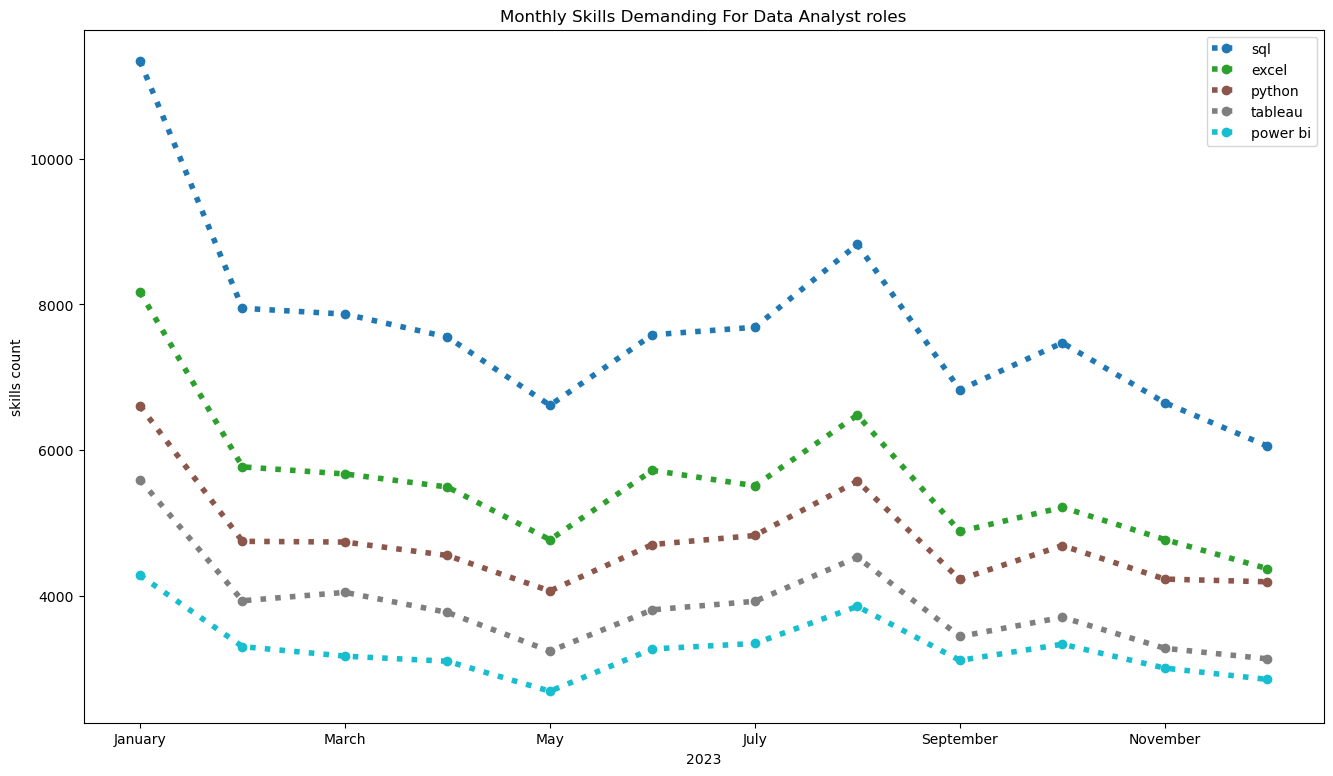

In [8]:
df_DA_skills_pivot.plot(
    kind="line",
    linewidth=4,
    colormap="tab10",
    linestyle=":",
    x="month_name",
    marker="o",
    figsize=(16,9)
)
plt.title("Monthly Skills Demanding For Data Analyst roles")
plt.xlabel("2023")
plt.ylabel("skills count")
plt.legend()
plt.show()

In [9]:
df_DA
df_working = df_DA.groupby("job_skills").agg(
    skill_count = ("job_skills", "count"),
    salary_avg = ("salary_year_avg", "median")
)
df_working = df_working.sort_values(by="skill_count", ascending=False).head(20)

C:\Users\ma3\AppData\Local\Temp\ipykernel_1076\1152252823.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_working["skill_count"][i], df_working["salary_avg"][i], df_working.index[i])


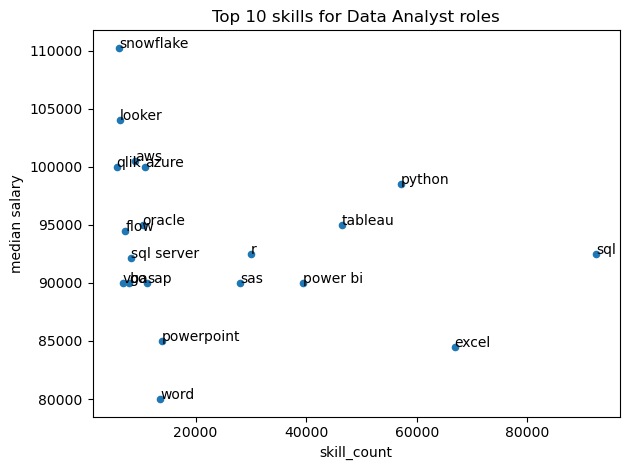

In [10]:
df_working.plot(kind="scatter", x="skill_count", y="salary_avg")
plt.xlabel("skill_count")
plt.ylabel("median salary")
plt.title("Top 10 skills for Data Analyst roles")
plt.tight_layout()
for i in range(len(df_working)):
    plt.text(df_working["skill_count"][i], df_working["salary_avg"][i], df_working.index[i])
plt.show()

C:\Users\ma3\AppData\Local\Temp\ipykernel_1076\2952504882.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts.append(plt.text(df_working["skill_count"][i], df_working["salary_avg"][i], df_working.index[i]))


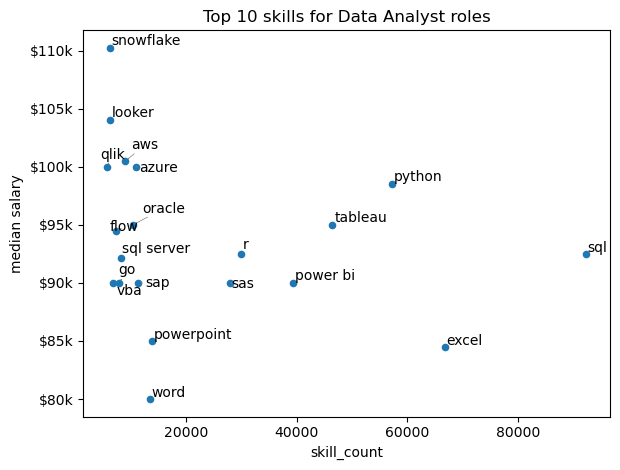

In [26]:
from adjustText import adjust_text

df_working.plot(kind="scatter", x="skill_count", y="salary_avg")
plt.xlabel("skill_count")
plt.ylabel("median salary")
plt.title("Top 10 skills for Data Analyst roles")
plt.tight_layout()

texts = []

for i in range(len(df_working)):
    texts.append(plt.text(df_working["skill_count"][i], df_working["salary_avg"][i], df_working.index[i]))


adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))

plt.show()